Amazon Sales Data Analysis

Exploratory Data Analysis (EDA)

        Descriptive Statistics: 
        Analyze and plot the distribution of rating and discount_percentage.
        Identify the correlation of rating to number of reviews.

        Category Analysis: 
        Determine the top categories and their average ratings. 
        Which categories have the highest and lowest average ratings. 
        Which categories offer the most significant discounts. 


Fetching and Cleaning Amazon Sales Data

In [44]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors

# Loading Data
df = pd.read_csv('amazon_sales_data.csv')

# Data Cleanup - Dropping NA values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating', 'rating_count'])
df['rating'] = df['rating'].astype(float)

Descriptive Statistics

Distribution of Product Ratings and Discounts

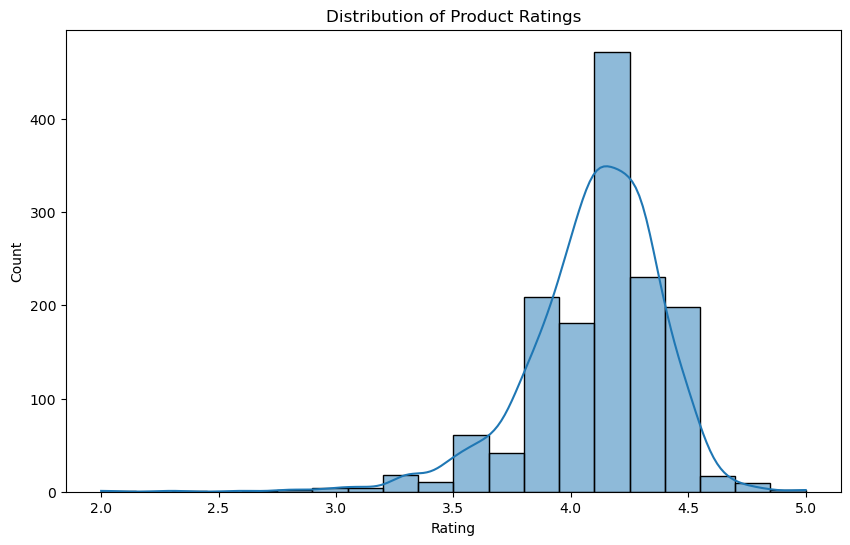

In [45]:
# Distribution of Product Ratings

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.title('Distribution of Product Ratings')
plt.show()

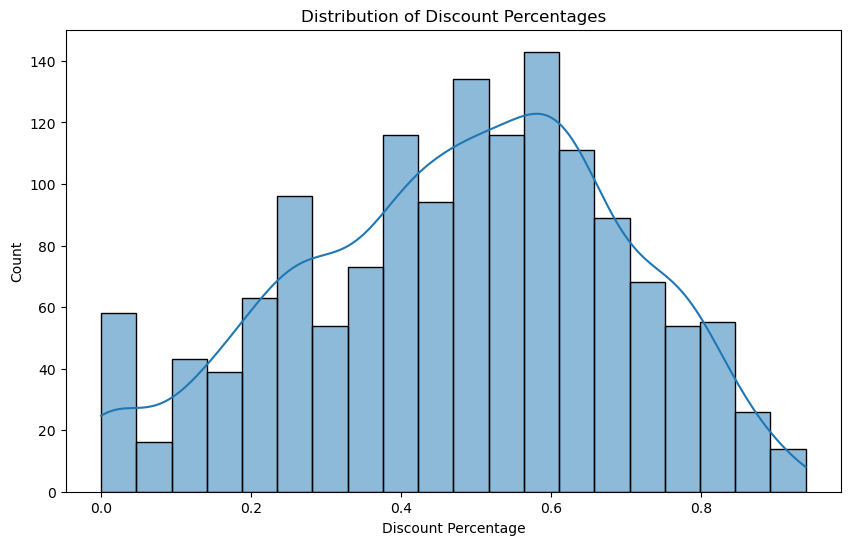

In [46]:
# Distribution of Discount Percentages

plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=20, kde=True)
plt.xlabel('Discount Percentage')
plt.title('Distribution of Discount Percentages')
plt.show()

Correlation of Rating to Review Count

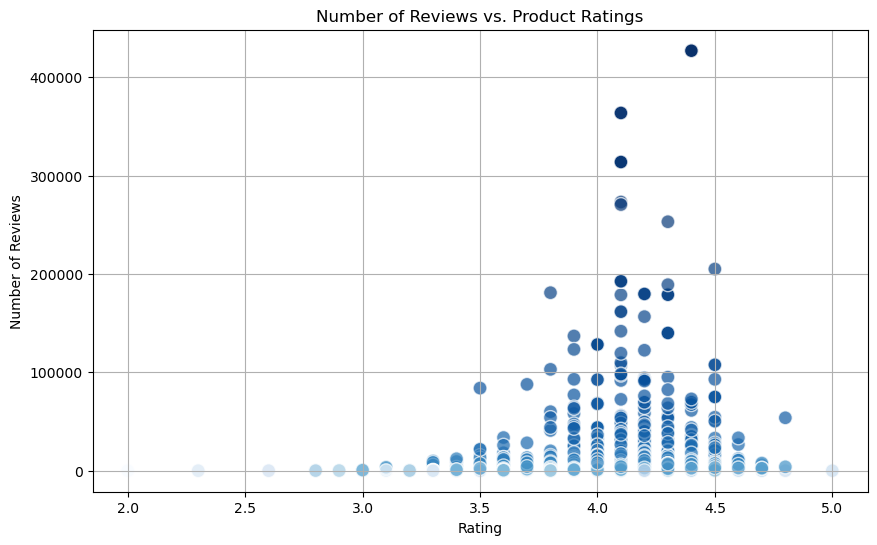

In [47]:
# Correlation of rating to rating count

# Define a custom normalization using a logarithmic scale
log_norm = mcolors.LogNorm(vmin=df['rating_count'].min(), vmax=df['rating_count'].max())
cmap = plt.get_cmap('Blues') 

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['rating'], df['rating_count'], c=df['rating_count'], cmap=cmap, norm=log_norm, alpha=0.7, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs. Product Ratings')
plt.grid(True)

# Display the plot
plt.show()# Correlation of rating to rating count

Category Analysis

Preping Data for Category Analysis

In [48]:
# Data Cleanup - Changing 'category' from a string to a list

df['category'] = df['category'].apply(lambda x: x.split('|'))

In [49]:
# Exploding category list that was just created to separate the categories in 'category'

df_categories = df.explode('category')

Top Categories and Average Rating

In [50]:
# What are the most common categories in this dataset

top_categories = df_categories['category'].value_counts().reset_index().head(10)

top_categories

,category,count
0,Electronics,526
1,Computers&Accessories,451
2,Home&Kitchen,447
3,Accessories&Peripherals,379
4,Kitchen&HomeAppliances,307
5,Cables,265
6,Cables&Accessories,238
7,USBCables,231
8,SmallKitchenAppliances,181
9,"HomeTheater,TV&Video",162


In [51]:
# What are the average review ratings for the top categories

category_rating = df_categories.groupby(['category'])['rating'].mean().to_frame('avg_rating').reset_index()

top_category_ratings = pd.merge(top_categories,
         category_rating,
         on='category'
)

top_category_ratings[['category', 'avg_rating']]

,category,avg_rating
0,Electronics,4.081749
1,Computers&Accessories,4.155654
2,Home&Kitchen,4.040716
3,Accessories&Peripherals,4.149340
4,Kitchen&HomeAppliances,4.053420
5,Cables,4.166038
6,Cables&Accessories,4.153782
7,USBCables,4.153247
8,SmallKitchenAppliances,4.056354
9,"HomeTheater,TV&Video",4.075309


Category Highest and Lowest Average Ratings

In [52]:
# Best rated product categories on Amazon

category_rating.sort_values('avg_rating').tail(10).reset_index(drop=True)

,category,avg_rating
0,SurgeProtectors,4.5
1,Film,4.5
2,CordManagement,4.5
3,MediaStreamingDevices,4.5
4,Memory,4.5
5,CoffeePresses,4.5
6,StreamingClients,4.5
7,PowerLANAdapters,4.5
8,Basic,4.5
9,Tablets,4.6


In [53]:
# Worst rated product categories on Amazon

category_rating.sort_values('avg_rating').head(10).reset_index(drop=True)

,category,avg_rating
0,ElectricGrinders,3.30
1,CoffeeGrinders,3.30
2,DustCovers,3.40
3,PCHeadsets,3.50
4,3DGlasses,3.50
5,PCMicrophones,3.60
6,InkjetPrinters,3.60
7,HalogenHeaters,3.60
8,Printers,3.64
9,Sewing&EmbroideryMachines,3.65


Most Significant Discounts by Category

In [54]:
# Creating a new data frame for only significant categories (> 50 occurances)

category_size = df_categories.groupby(['category']).size()

signif_category = category_size[category_size > 50].index

df_categories_filter = df_categories[df_categories['category'].isin(signif_category)]

# Calculating average discount per significant category

df_categories_filter.groupby(['category'])['discount_percentage'].mean().to_frame().sort_values('discount_percentage', ascending=False).reset_index().head(20)

,category,discount_percentage
0,WearableTechnology,0.698158
1,SmartWatches,0.698158
2,MobileAccessories,0.609881
3,Cables&Accessories,0.595714
4,"Headphones,Earbuds&Accessories",0.595303
5,USBCables,0.592208
6,Cables,0.589925
7,In-Ear,0.582692
8,Headphones,0.578548
9,Accessories,0.570360
